## Warmup 0a: Run these!

In [1]:
import os
from collections import namedtuple

## Warmup 0b:

1. Give an example of a mutable object
   
   **list, dict, set**
   
3. Give an example of an immutable object
   
   **string, tuple**

## Warmup 1: Create a type `Fruit` that has 3 attributes (use namedtuple)
- name
- num_seeds
- juicyness

In [2]:
# define your Fruit type here
Fruit = namedtuple("Fruit", ['name', 'num_seeds', 'juicyness'])

## Warmup 2: Add three fruits to the list. You choose!
- name should be a **string**
- num_seeds should be an **int**
- juicyness should be a **float** between `[0.0, 100.0]`

In [3]:
fruits = [
    Fruit("Apple", 20, 25.0),
    Fruit("Pineapple", 0, 75.0),
    Fruit("Strawberry", 100, 45.0)
]

## Warmup 3: Sort fruits based on juicyness

In [4]:
# sort the list 'fruits' and display here
fruits.sort(key=lambda f:f.juicyness)
fruits

[Fruit(name='Apple', num_seeds=20, juicyness=25.0),
 Fruit(name='Strawberry', num_seeds=100, juicyness=45.0),
 Fruit(name='Pineapple', num_seeds=0, juicyness=75.0)]

## Warmup 4: Create a list of `Fruit` objects that have `>10` seeds using list comprehension

In [5]:
# write your code here
[f for f in fruits if f.num_seeds > 10]

[Fruit(name='Apple', num_seeds=20, juicyness=25.0),
 Fruit(name='Strawberry', num_seeds=100, juicyness=45.0)]

## Warmup 5: Same thing as above, but just the names of the fruit

In [6]:
# write your code here
[f.name for f in fruits if f.num_seeds > 10]

['Apple', 'Strawberry']

## Warmup 6: Same thing as above, but if it has `juicyness > 33`, display it in uppercase

In [7]:
# write your code here
[f.name.upper() if f.juicyness > 33 else f.name for f in fruits if f.num_seeds > 10]

['Apple', 'STRAWBERRY']

## Warmup 7: Create a dictionary mapping each fruit's name to its total number of seeds using dict comprehension

In [8]:
# write your code here
{f.name: f.num_seeds for f in fruits}

{'Apple': 20, 'Strawberry': 100, 'Pineapple': 0}

## Warmup 8: Can you change the name of a fruit?

**No**, namedtuples are **immutable**.

In [9]:
# write your code here
fruits[0].name = "fail"

AttributeError: can't set attribute

## Warmup 9: Catch any errors the user may make, but allow the user to keep entering more fruits even if there is an error

In [10]:
user_fruits = []
while True:
    print("Current fruits", user_fruits)
    add_more_fruits = input("Enter 'y' if you want to add more fruits: ")
    if add_more_fruits != "y":
        break
    try:
        fruit_name = input("Enter a name for the fruit: ")
        fruit_seeds = int(input("Enter a num_seeds for the fruit: "))
        if fruit_seeds < 0:
            raise ValueError("num_seeds must be a non-negative number")
        fruit_juicy = float(input("Enter a juicyness for the fruit: "))
        if not (0 <= fruit_juicy <= 100):
            raise ValueError("juicyness must be a float between 0.0 and 100.0")
        user_fruits.append(Fruit(fruit_name, fruit_seeds, fruit_juicy))
    except Exception as e:
        print(type(e))
        print(e)

Current fruits []


Enter 'y' if you want to add more fruits:  y
Enter a name for the fruit:  Apple
Enter a num_seeds for the fruit:  20
Enter a juicyness for the fruit:  25


Current fruits [Fruit(name='Apple', num_seeds=20, juicyness=25.0)]


Enter 'y' if you want to add more fruits:  y
Enter a name for the fruit:  Mango
Enter a num_seeds for the fruit:  -1


<class 'ValueError'>
num_seeds must be a non-negative number
Current fruits [Fruit(name='Apple', num_seeds=20, juicyness=25.0)]


Enter 'y' if you want to add more fruits:  y
Enter a name for the fruit:  Pineapple
Enter a num_seeds for the fruit:  0
Enter a juicyness for the fruit:  150


<class 'ValueError'>
juicyness must be a float between 0.0 and 100.0
Current fruits [Fruit(name='Apple', num_seeds=20, juicyness=25.0)]


Enter 'y' if you want to add more fruits:  y
Enter a name for the fruit:  Strawberry
Enter a num_seeds for the fruit:  0.5


<class 'ValueError'>
invalid literal for int() with base 10: '0.5'
Current fruits [Fruit(name='Apple', num_seeds=20, juicyness=25.0)]


Enter 'y' if you want to add more fruits:  n


## Lecture 26:  Files and Directories

**Learning Objectives:**

 - Use built-in functions with files:
   - `open`
   - `close`
   - `read`
   - `write`
 - Use file-specific os module functions:
   - `os.listdir`
   - `os.mkdir`
   - `os.path.exists`
   - `os.path.isfile`
   - `os.path.isdir`
   - `os.path.join`

 - Use `try/except` blocks or a with statement to handle errors that may occur when using files

### Use built-in functions with files: open, close, read, write

## Example 1a: Let's learn how to write to a file

Write this content to the file `debug_tips.txt`:

```
Debug Tips:
1. Write the least amount of code you can test
2. Don't try to write the complete solution at first
3. Assume from the start that things will go wrong
4. Always know the state of your program (print out vital information)
```

In [11]:
# open a file, give it a name, prepare it for writing
file_obj = open("debug_tips.txt", "w")

# use the write method to write a string to the file
file_obj.write("Debug Tips:\n")
file_obj.write("1. Write the least amount of code you can test\n")

# TODO: Complete the rest!
file_obj.write("2. Don't try to write the complete solution at first\n")
file_obj.write("3. Assume from the start that things will go wrong\n")
file_obj.write("4. Always know the state of your program (print out vital information)\n")

# you MUST close the file for the changes to actual be stored in the file
file_obj.close()

## Example 1b: Let's learn how to write to a file

Write 10 random ints (from 1 to 5) to a file `nums.txt`

In [12]:
import random
nums_path = "nums.txt"
fo = open(nums_path, "w")
for i in range(10):
    fo.write(str(random.randint(1,5)) + "\n")
fo.close()

## Example 2: Overwrite the file `nums.txt` by writing 10,000 random ints (from 1 to 10) to the same file

In [13]:
fo = open(nums_path, "w")
for i in range(10000):
    fo.write(str(random.randint(1,10)) + "\n")
fo.close()

## Exercise 1: What if we want to write one more debugging tip to `debug_tips.txt`?

We'll come back to this!

In [14]:
file_obj = open("debug_tips.txt", "w")
file_obj.write("5. Writing a program is not a linear path; there will be ups and downs!\n")
file_obj.close()

### Reading Files

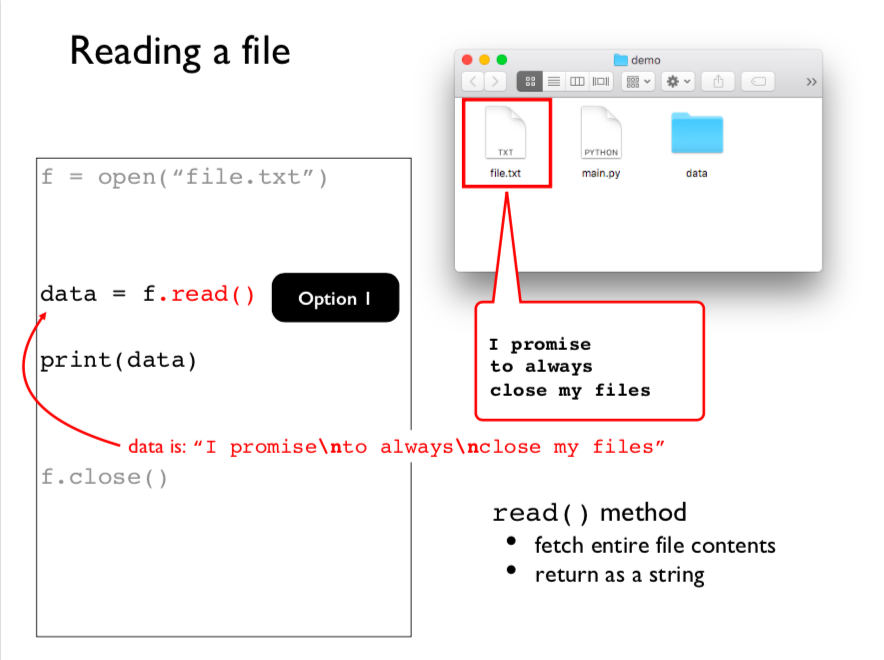

## Example 3: Read the contents of `debug_tips.txt`

In [15]:
# create a file object but open for READING
path = "debug_tips.txt"
f_obj = open(path, 'r') # "r" is optional

# use the read method to read the contents of the file
data = f_obj.read()
print(data)

# you MUST close the file
f_obj.close()

5. Writing a program is not a linear path; there will be ups and downs!



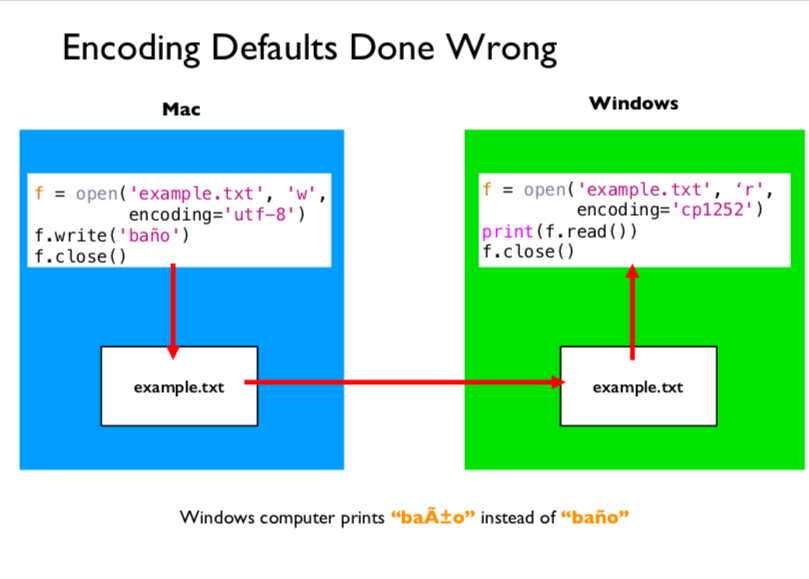

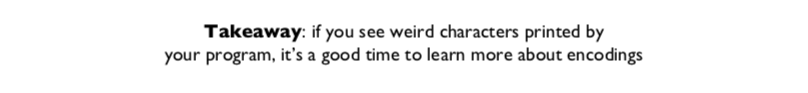


## Example 4a: Add the fifth debugging tip, but do not overwrite what's currently in the file!

Read the contents of the file before opening the file in `w` mode and write the already existing text first, before writing the new text.

In [16]:
# Read in the already existing text...
path = "debug_tips.txt"
f_obj = open(path, 'r', encoding='utf-8') # "r" is optional
data = f_obj.read()
f_obj.close()

file_obj = open(path, "w", encoding='utf-8')
# ... and add it on to the new.
file_obj.write(data)
file_obj.write("5. Writing a program is not a linear path; there will be ups and downs!\n")
file_obj.close()

## Example 4b: Add the fifth debugging tip, but do not overwrite what's currently in the file!

Append the new text directly.

In [17]:
file_obj = open(path, "a", encoding='utf-8') # "a" stands for 'append'
file_obj.write("5. Writing a program is not a linear path; there will be ups and downs!\n")
file_obj.close()

## Example 5: Read the file `debug_tips.txt` as a list

In [18]:
file_obj = open("debug_tips.txt", encoding='utf-8')
my_data = list(file_obj)
print(my_data)
file_obj.close()

['5. Writing a program is not a linear path; there will be ups and downs!\n', '5. Writing a program is not a linear path; there will be ups and downs!\n', '5. Writing a program is not a linear path; there will be ups and downs!\n']


## Exercise 2: Sum all the numbers in `nums.txt`

In [20]:
# write your code here
path = "nums.txt"
f_obj = open(path, encoding='utf-8')
lines = list(f_obj)
nums = []
for line in lines:
    actual_num = int(line.strip())
    nums.append(actual_num)
sum(nums)

55094

### Use these file-specific os module functions:

- `os.listdir`
- `os.mkdir`
- `os.path.exists`
- `os.path.isfile`
- `os.path.isdir`
- `os.path.join`

#### `os.listdir` returns a list of the contents of a directory

In [21]:
os.listdir(".")

['.ipynb_checkpoints',
 'debug_tips.txt',
 'Lec26_Files_and_Directories_Solution.ipynb',
 'Lec26_Files_and_Directories_Template.ipynb',
 'nums.txt',
 'points.json']

#### `os.mkdir` makes a new directory

Similar to mkdir command in PowerShell. Note if you run the same command twice, the 2nd time you will get an error. Why?

In [22]:
os.mkdir("ashwin's folder")
os.listdir(".")

['.ipynb_checkpoints',
 "ashwin's folder",
 'debug_tips.txt',
 'Lec26_Files_and_Directories_Solution.ipynb',
 'Lec26_Files_and_Directories_Template.ipynb',
 'nums.txt',
 'points.json']

#### `os.path.exists`, `os.path.isfile`, and `os.path.isdir` checks if a file or a directory exists inside a directory

`os.path` is a submodule of `os`, it does not need to be imported again

In [23]:
print(os.path.exists("ashwin's folder")) # does this file/folder (at this path) exist?
print(os.path.isfile("ashwin's folder")) # does this file (at this path) exist?
print(os.path.isdir("ashwin's folder")) # # does this folder (at this path) exist?

True
False
True


#### `os.path.join` is like the list join method, which combines things into a string

It automatically senses which OS you are using and joins them with either a `\` or `/`

In [24]:
path = os.path.join("my_folder", "file1.txt")
print(path)  # what do you get? 

my_folder\file1.txt


**There are lots of things that can go wrong when reading or writing files**
- file does not exist
- you don't have write permission
- not enough space on the drive to write out the entire file
- use a directory name in place file name (or vice versa)
- and more....

## Exercise 3: let's figure out how to handle a command to open a file that does not exist

Does this cover all exceptions? What else could go wrong? What does this mean for opening and closing a file?

In [25]:
path = input("enter the name of the file to open:")
try:
    file_object = open(path, "r", encoding='utf-8')  # "r" is for reading, but is the default
    d = file_object.read()
    print(d)
    file_object.close()
except FileNotFoundError as e:
    print(type(e))
    print(path, "could not be opened")

enter the name of the file to open: points.json


{
  "Ashwin": 2
}


**Python is all about shortening code. Is there a way to shorten the process of:**
- opening a file
- handling any Errors while reading/writing
- closing the file

## Example 6: We can use a `with` statement to shorten our code

We don't need to close, even if there's an error!

In [26]:
import random

with open("some_numbers.txt", "w", encoding='utf-8') as f: 
    for i in range(10):
        f.write(str(random.randint(1,100)) + "\n")

**Case Studies:  Mostly finished, larger programs**

Goal:  Run the program, read the code, make small changes


## Case Study 1: Score Tracker

In [27]:
import json  # to read/write a JSON file
import os    # to see if score file exists

def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f) # dict, list, etc

# data is a dict, list, etc
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)
        

def add_point(player_name, file_name):
    # TOOD: Check if `file_name` exists, if so load data from it
    if os.path.exists(file_name):
        scores = read_json(file_name)
    else:
        scores = {}
    # TODO: Check if player is a known player and increase their score by 1
    if player_name in scores:
        scores[player_name] += 1
    else:
        scores[player_name] = 1
    write_json(file_name, scores)

    # TODO: print out each person's score
    print(scores)

In [28]:
add_point("Ashwin", "points.json")

{'Ashwin': 3}


In [29]:
add_point("Jane", "points.json")

{'Ashwin': 3, 'Jane': 1}


In [30]:
add_point("Ashwin", "more_points.json")

{'Ashwin': 1}


## Case Study 2: Recursive File Searcher

In an earlier lecture, we wrote a function that recursively searches a list of lists. This program takes that idea and applies it to files and directories. To understand this program, you might want to first see what directories you have.

Try exploring your computer with `os.listdir`

In [31]:
import os

def recursive_dir_search(search_directory, search_file_name):
    for curr in os.listdir(search_directory):   
        # build a path to this current thing
        curr = os.path.join(search_directory, curr) 
        
        # check if curr is a file
        if os.path.isfile(curr):
            # check if it contains the search name 
            if search_file_name in curr:     # base case...no recursive call
                f = open(curr, encoding='utf-8')
                contents = f.read()      # reads the contents of the file into a string
                f.close()
                return contents
        else:                              # recursive case!!
            contents = recursive_dir_search(curr, search_file_name)
            if contents != None:           # we found something
                return contents           
            
    # finished all recursive searching and never found it   
    return None       


# this function is like our main program
def dir_search(dir_name, file_name):
    if not os.path.exists(dir_name):
        print("Unable to find search_directory!")
    else:
        contents = recursive_dir_search(dir_name, file_name)
        if contents == None:
            print(file_name, "not found")
        else:
            print(contents)

In [32]:
dir_search(".", "project.py")

project.py not found


In [33]:
dir_search("..", "project.py")

__student__ = []


def __init__():
    import csv
    """This function will read in the csv_file and store it in a list of dictionaries"""
    __student__.clear()
    with open('cs220_survey_data.csv', mode='r', encoding='utf-8') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            __student__.append(row)

def count():
    """This function will return the number of records in the dataset"""
    return len(__student__)


def get_lecture(idx):
    """get_lecture(idx) returns the lecture of the student in row idx"""
    return __student__[int(idx)]['Lecture']


def get_section(idx):
    """get_lecture(idx) returns the section of the student in row idx"""
    return __student__[int(idx)]['section']


def get_age(idx):
    """get_age(idx) returns the age of the student in row idx"""
    return __student__[int(idx)]['Age']


def get_primary_major(idx):
    """get_primary_major(idx) returns the primary major of the student in row idx"""
    ret